In [ ]:
import pandas as pd
import heapq
from itertools import permutations
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''graph = {
    1: {2: 4, 3: 2},
    2: {1: 4, 3: 5, 4: 10},
    3: {1: 2, 2: 5, 4: 3, 5: 1},
    4: {2: 10, 3: 3, 5: 2, 6: 1},
    5: {3: 1, 4: 2, 6: 6, 7: 3},
    6: {4: 1, 5: 6, 7: 2},
    7: {5: 3, 6: 2},
}'''


distance_matrix = np.array([
    [np.inf, 4, 2, np.inf, np.inf, np.inf, np.inf],
    [4, np.inf, 5, 10, np.inf, np.inf, np.inf],
    [2, 5, np.inf, 3, 1, np.inf, np.inf],
    [np.inf, 10, 3, np.inf, 2, 1, np.inf],
    [np.inf, np.inf, 1, 2, np.inf, 6, 3],
    [np.inf, np.inf, np.inf, 1, 6, np.inf, 2],
    [np.inf, np.inf, np.inf, np.inf, 3, 2, np.inf]
])


#Create Dataset

In [ ]:

# Defining possible values for TimeOfDay, Weather, and TrafficVolume
time_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
weather = ['Sunny', 'Rainy', 'Foggy']
traffic_volume = ['High', 'Moderate', 'Low']

# Function to assign traffic volume based on certain conditions
def assign_traffic_volume(time, weather):
    if weather == 'Rainy' or weather == 'Foggy':
        if time == 'Morning':
            return random.choices(['High', 'Moderate'], weights=[0.8, 0.2])[0]
        else:
            return random.choices(['High', 'Moderate', 'Low'], weights=[0.5, 0.3, 0.2])[0]
    elif time == 'Morning':
        return random.choices(['High', 'Moderate', 'Low'], weights=[0.6, 0.3, 0.1])[0]
    else:
        return random.choice(['Moderate', 'Low'])

# Generate the dataset
data = []
for _ in range(100):
    time = random.choice(time_of_day)
    weath = random.choice(weather)
    traffic = assign_traffic_volume(time, weath)
    data.append([time, weath, traffic])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['TimeOfDay', 'Weather', 'TrafficVolume'])

# Saving to a CSV file
df.to_csv('TrafficVolumeDataset.csv', index=False)

df.head()

,TimeOfDay,Weather,TrafficVolume
0,Night,Foggy,Moderate
1,Evening,Sunny,Low
2,Afternoon,Sunny,Moderate
3,Afternoon,Rainy,High
4,Afternoon,Rainy,High


#1. Sets





In [ ]:
df = pd.read_csv('TrafficVolumeDataset.csv')

weather=input("Enter Weather[Rainny,Sunny,Foggy]: ")
time=input("Enter Time[Morning, Afternoon, Evening]: ")

Set_Weather=df[df['Weather']==weather]
#print(Set_Weather)
print(f'Total samples with {weather} weather are {len(Set_Weather)}')

Set_TimeOfDay=df[df['TimeOfDay']==time]
#print(Set_TimeOfDay)
print(f'Total samples with {time} time are {len(Set_TimeOfDay)}')



TimeOfDay_Weather = df[(df['Weather'] == weather) & (df['TimeOfDay'] == time)]
print(TimeOfDay_Weather)
Total_TimeOfDay_Weather=len(TimeOfDay_Weather)
print( f'Total samples with {weather} weather and {time} time {Total_TimeOfDay_Weather}')


Enter Weather[Rainny,Sunny,Foggy]: Sunny
Enter Time[Morning, Afternoon, Evening]: Morning
Total samples with Sunny weather are 34
Total samples with Morning time are 18
   TimeOfDay Weather TrafficVolume
45   Morning   Sunny      Moderate
71   Morning   Sunny          High
90   Morning   Sunny           Low
91   Morning   Sunny      Moderate
Total samples with Sunny weather and Morning time 4


#2.Probability

In [ ]:
trafficvol = df[df['TrafficVolume'] == 'High']
total_trafficvol=len(trafficvol)
#Prob. Of High Traffic
high_traffic_count = len(TimeOfDay_Weather[TimeOfDay_Weather['TrafficVolume'] == 'High'])
prob_high_traffic = round((high_traffic_count / Total_TimeOfDay_Weather),2)
print(f'Prob. of High Traffic P(H)= {high_traffic_count}/{Total_TimeOfDay_Weather}={prob_high_traffic}')

#Prob. Of Moderate Traffic
moderate_traffic_count = len(TimeOfDay_Weather[TimeOfDay_Weather['TrafficVolume'] == 'Moderate'])
prob_moderate_traffic = round((moderate_traffic_count / Total_TimeOfDay_Weather),2)
print(f'Prob. of Moderate Traffic P(M)= {moderate_traffic_count}/{Total_TimeOfDay_Weather}={prob_moderate_traffic}')

#Prob. Of Low Traffic
low_traffic_count = len(TimeOfDay_Weather[TimeOfDay_Weather['TrafficVolume'] == 'Low'])
prob_low_traffic = round((low_traffic_count / Total_TimeOfDay_Weather),2)
print(f'Prob. of Low Traffic P(L)= {low_traffic_count}/{Total_TimeOfDay_Weather}={prob_low_traffic}')

Prob. of High Traffic P(H)= 1/4=0.25
Prob. of Moderate Traffic P(M)= 2/4=0.5
Prob. of Low Traffic P(L)= 1/4=0.25


#3.Linear Equations

In [ ]:
# coefficients for time adjustment based on traffic volume
high_coef = 1.5         # 50% increase
moderate_coef = 1.2     # 20% increase
low_coef = 1            # same time

print('The linear equation to find the time variance  "Δt = 1.5*P(H)+1.2*P(M)+1*P(L)"')

The linear equation to find the time variance  "Δt = 1.5*P(H)+1.2*P(M)+1*P(L)"


#4. Graph

In [ ]:
# Convert matrix to graph
def matrix_to_graph(matrix):
    graph = {}
    num_nodes = len(matrix)

    for i in range(num_nodes):
        graph[i + 1] = {}  # Initialize each node in graph (index + 1 for 1-based indexing)
        for j in range(num_nodes):
            if matrix[i][j] != np.inf:  # Ignore inf (no direct path)
                graph[i + 1][j + 1] = matrix[i][j]  # Add edge to the graph (index + 1 for 1-based indexing)

    return graph

def adj_cost(base_cost, prob_high, prob_moderate, prob_low):

    adjusted_cost = base_cost *( (high_coef * prob_high_traffic) + (moderate_coef * prob_moderate_traffic) +
        (low_coef * prob_low_traffic))
    adjusted_cost = round(adjusted_cost,2)   # Round to 2 decimal places

    return adjusted_cost

# Adjust graph costs based on above linear equation
def adjust_graph_based_on_traffic(graph):
    adjusted_graph = {}
    for city, neighbors in graph.items():
        adjusted_graph[city] = {}
        for neighbor, cost in neighbors.items():
            adjusted_graph[city][neighbor] = adj_cost(cost, prob_high_traffic, prob_moderate_traffic, prob_low_traffic)
    return adjusted_graph

def dijkstra(adjusted_graph, start, target):
    queue = [(0, start)]
    min_cost = {start: 0}
    previous = {start: None}

    while queue:
        cost, node = heapq.heappop(queue)

        if node == target:
            path = []
            while node is not None:
                path.append(node)
                node = previous[node]
            return round(cost,2), path[::-1]  # Return cost and path

        for neighbor, weight in adjusted_graph[node].items():
            new_cost = cost + weight

            if neighbor not in min_cost or new_cost < min_cost[neighbor]:
                min_cost[neighbor] = new_cost
                previous[neighbor] = node
                heapq.heappush(queue, (new_cost, neighbor))

    return float('inf'), []  # If no path found

def find_shortest_delivery_path(graph, start, targets):
    min_total_cost = float('inf')
    best_path = []
    adjusted_graph = adjust_graph_based_on_traffic(graph)
    print(graph)
    print(adjusted_graph)
    # Check all permutations of the target companies to find the most efficient delivery order
    for perm in permutations(targets):
        current_cost = 0
        current_path = [start]
        print("***********")
        # Calculate cost for this permutation
        current_location = start
        for target in perm:
            cost, path = dijkstra(adjusted_graph, current_location, target)
            print(cost,path)
            if cost == float('inf'):
                current_cost = float('inf')
                break
            current_cost += cost
            current_path += path[1:]  # Append path without the starting point

            current_location = target

        if current_cost < min_total_cost:
            min_total_cost = round(current_cost,2)
            best_path = current_path

        print(perm,round(current_cost,2),current_path)
        print("***********")
    return min_total_cost, best_path

# Input: Starting company and companies to deliver to
starting_company = 1
target_companies = [2, 3, 6]  # Example delivery targets
graph=matrix_to_graph(distance_matrix)
# Find the shortest delivery path and cost
total_cost, delivery_path = find_shortest_delivery_path(graph, starting_company, target_companies)
#print([i for i in permutations(target_companies)])
if total_cost == float('inf'):
    print("No valid delivery path found.")

else:
    print(f"Total minimun delivery time: {total_cost}, with Delivery path: {delivery_path}")

{1: {2: 4.0, 3: 2.0}, 2: {1: 4.0, 3: 5.0, 4: 10.0}, 3: {1: 2.0, 2: 5.0, 4: 3.0, 5: 1.0}, 4: {2: 10.0, 3: 3.0, 5: 2.0, 6: 1.0}, 5: {3: 1.0, 4: 2.0, 6: 6.0, 7: 3.0}, 6: {4: 1.0, 5: 6.0, 7: 2.0}, 7: {5: 3.0, 6: 2.0}}
{1: {2: 4.9, 3: 2.45}, 2: {1: 4.9, 3: 6.12, 4: 12.25}, 3: {1: 2.45, 2: 6.12, 4: 3.68, 5: 1.23}, 4: {2: 12.25, 3: 3.68, 5: 2.45, 6: 1.23}, 5: {3: 1.23, 4: 2.45, 6: 7.35, 7: 3.68}, 6: {4: 1.23, 5: 7.35, 7: 2.45}, 7: {5: 3.68, 6: 2.45}}
***********
4.9 [1, 2]
6.12 [2, 3]
4.91 [3, 4, 6]
(2, 3, 6) 15.93 [1, 2, 3, 4, 6]
***********
***********
4.9 [1, 2]
11.03 [2, 3, 4, 6]
4.91 [6, 4, 3]
(2, 6, 3) 20.84 [1, 2, 3, 4, 6, 4, 3]
***********
***********
2.45 [1, 3]
6.12 [3, 2]
11.03 [2, 3, 4, 6]
(3, 2, 6) 19.6 [1, 3, 2, 3, 4, 6]
***********
***********
2.45 [1, 3]
4.91 [3, 4, 6]
11.03 [6, 4, 3, 2]
(3, 6, 2) 18.39 [1, 3, 4, 6, 4, 3, 2]
***********
***********
7.36 [1, 3, 4, 6]
11.03 [6, 4, 3, 2]
6.12 [2, 3]
(6, 2, 3) 24.51 [1, 3, 4, 6, 4, 3, 2, 3]
***********
***********
7.36 [1, 3, 4, 6

# 5.Distributions and Descriptive Statistics

         Date  DeliveryTime
0  2024-07-09         60.00
1  2024-07-10         55.56
2  2024-07-11         60.00
3  2024-07-12         66.81
4  2024-07-13         56.93
Mean Delivery Time: 60.00 minutes
Median Delivery Time: 60.00 minutes
Mode Delivery Time: 60.00 minutes
Variance of Delivery Time: 15.91
Standard Deviation of Delivery Time: 3.99
95% of the delivery times are expected to be between 52.02 and 67.98 minutes


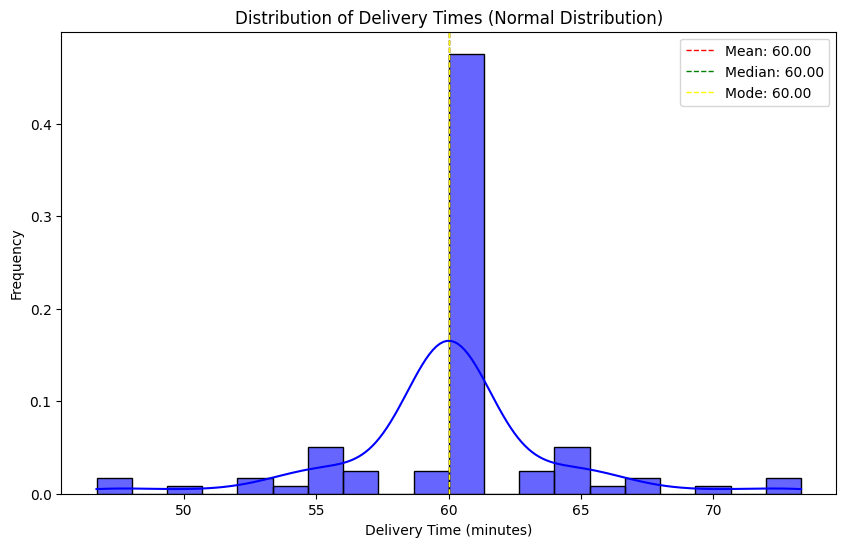

In [ ]:
# Dataset Creation and Save the DataFrame to a CSV file
np.random.seed(39)
mean_delivery_time = 60
std_dev = 5
num_samples = 90
half_size = num_samples // 2
lower_half = np.random.normal(loc=mean_delivery_time, scale=std_dev, size=half_size)
lower_half = np.clip(lower_half, mean_delivery_time - 20, mean_delivery_time)
upper_half = mean_delivery_time + (mean_delivery_time - lower_half)
delivery_times = np.concatenate((lower_half, upper_half))
np.random.shuffle(delivery_times)
date_range = pd.date_range(end=pd.Timestamp.today(), periods=num_samples, freq='D').date
# Create the DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'DeliveryTime': delivery_times.round(2)  # Round to 2 decimal places for delivery time
})
df.to_csv('DeliveryTimes.csv', index=False)
print(df.head())
# Calculate mean, median, and mode
mean_value = df['DeliveryTime'].mean()
median_value = df['DeliveryTime'].median()
mode_value = df['DeliveryTime'].mode()[0]  # mode() returns a series, so [0] gives the first mode
variance_value = df['DeliveryTime'].var()
std_dev_value = df['DeliveryTime'].std()
# Descriptive Statistics
print(f"Mean Delivery Time: {mean_value:.2f} minutes")
print(f"Median Delivery Time: {median_value:.2f} minutes")
print(f"Mode Delivery Time: {mode_value:.2f} minutes")
print(f"Variance of Delivery Time: {variance_value:.2f}")
print(f"Standard Deviation of Delivery Time: {std_dev_value:.2f}")

# 95% Confidence Interval (Mean ± 2 * Standard Deviation)
lower_bound = mean_value - 2 * std_dev_value
upper_bound = mean_value + 2 * std_dev_value

print(f"95% of the delivery times are expected to be between {lower_bound:.2f} and {upper_bound:.2f} minutes")


#Normal Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['DeliveryTime'], bins=20, kde=True, color='blue', alpha=0.6, stat='density')
plt.title('Distribution of Delivery Times (Normal Distribution)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='yellow', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')
plt.legend()
plt.show()

#6. Eigen Vectors

In [ ]:
import numpy as np
import pandas as pd

# Given distance matrix
distance_matrix = np.array([
    [np.inf, 4, 2, np.inf, np.inf, np.inf, np.inf],
    [4, np.inf, 5, 10, np.inf, np.inf, np.inf],
    [2, 5, np.inf, 3, 1, np.inf, np.inf],
    [np.inf, 10, 3, np.inf, 2, 1, np.inf],
    [np.inf, np.inf, 1, 2, np.inf, 6, 3],
    [np.inf, np.inf, np.inf, 1, 6, np.inf, 2],
    [np.inf, np.inf, np.inf, np.inf, 3, 2, np.inf]
])

# Example delivery dataset: binary (0 = no delivery, 1 = delivery)
# Rows = days, Columns = stores
delivery_data = pd.DataFrame({
    'Store 1': [1, 0, 1, 0, 1],
    'Store 2': [0, 1, 0, 1, 1],
    'Store 3': [1, 1, 1, 1, 0],
    'Store 4': [0, 0, 1, 1, 1],
    'Store 5': [1, 0, 0, 0, 1],
    'Store 6': [0, 1, 1, 0, 1],
    'Store 7': [0, 0, 1, 1, 0]
})

# Calculate average delivery matrix (probability of delivery between stores)
delivery_frequency = delivery_data.mean().values.reshape(-1, 1)
print(delivery_data)
average_delivery_matrix = delivery_frequency @ delivery_frequency.T

# Add distance matrix weighting (higher weight for stores that are closer)
adjacency_matrix = np.where(np.isinf(distance_matrix), 0, 1 / distance_matrix)  # Inverse of distances

# Final weighted adjacency matrix (combining delivery frequency and distances)
weighted_adj_matrix = adjacency_matrix * average_delivery_matrix

# Replace diagonal with 0 (no self-connections)
np.fill_diagonal(weighted_adj_matrix, 0)

print("Weighted Adjacency Matrix (Delivery Frequency x Distance Weight):")
print(weighted_adj_matrix)


   Store 1  Store 2  Store 3  Store 4  Store 5  Store 6  Store 7
0        1        0        1        0        1        0        0
1        0        1        1        0        0        1        0
2        1        0        1        1        0        1        1
3        0        1        1        1        0        0        1
4        1        1        0        1        1        1        0
Weighted Adjacency Matrix (Delivery Frequency x Distance Weight):
[[0.         0.09       0.24       0.         0.         0.
  0.        ]
 [0.09       0.         0.096      0.036      0.         0.
  0.        ]
 [0.24       0.096      0.         0.16       0.32       0.
  0.        ]
 [0.         0.036      0.16       0.         0.12       0.36
  0.        ]
 [0.         0.         0.32       0.12       0.         0.04
  0.05333333]
 [0.         0.         0.         0.36       0.04       0.
  0.12      ]
 [0.         0.         0.         0.         0.05333333 0.12
  0.        ]]


In [ ]:
from scipy.linalg import eig

# Calculate eigenvalues and eigenvectors of the weighted adjacency matrix
eigenvalues, eigenvectors = eig(weighted_adj_matrix)

# Find the eigenvector corresponding to the largest eigenvalue
largest_eigenvalue_index = np.argmax(np.real(eigenvalues))
eigenvector_centrality = np.real(eigenvectors[:, largest_eigenvalue_index])

# Normalize the centrality scores
eigenvector_centrality /= np.sum(eigenvector_centrality)

# Print eigenvector centrality of each store
print("Eigenvector Centrality for each store:")
for i, centrality in enumerate(eigenvector_centrality):
    print(f"Store {i+1}: {centrality:.4f}")


Eigenvector Centrality for each store:
Store 1: 0.1057
Store 2: 0.0682
Store 3: 0.2223
Store 4: 0.2082
Store 5: 0.1869
Store 6: 0.1575
Store 7: 0.0513
